# Анализ бизнес-показателей развлекательного приложения 
# Procrastinate Pro+.

**Цель исследования.**

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

На основе данных, предоставленных компанией, необходимо провести анализ и ответить на вопросы:

- Откуда приходят пользователи и какими устройствами они пользуются.
- Сколько стоит привлечение пользователей из различных рекламных каналов.
- Сколько денег приносит каждый клиент.
- Когда расходы на привлечение клиента окупаются.
- Какие факторы мешают привлечению клиентов.


**Имеющиеся данные.**

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
Структура visits_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.

Структура costs_info_short.csv:

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

**План работы:**
- 1)Изучить данные.
 - Провести предобработку данных.
- 2)Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- 3)Провести исследовательский анализ данных:
 - Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей
 - Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны
 - Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
 - Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей
- 4)Маркетинг:
 - Составить портрет пользователя каждого региона.
 - Проверить гипотезы.
 - Посчитать общую сумму расходов на маркетинг.
 - Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
 - Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
 - Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
- 5)Оценим окупаемость рекламы:
 - Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
 - Проверим конверсию пользователей и динамику её изменения.
 - Проанализируем окупаемость рекламы с разбивкой по устройствам.
 - Проанализируем окупаемость рекламы с разбивкой по странам.
 - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

### Загрузите данные и подготовьте их к анализу.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузим библиотеки и изучим предоставленные файлы.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
display(visits.head(10))
visits.info()
visits.describe()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


In [4]:
display(orders.head(10))
orders.info()
orders.describe()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [5]:
display(costs.head(10))
costs.info()
costs.describe()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [6]:


def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
visits = inspect(visits)


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов - 0


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

**************************************************


United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

**************************************************


iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

**************************************************


organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

**************************************************


**Мы ознакомились с сетами. На первый взгляд, пропусков нет, но кое-что требует правки: нужно поменять тип данных в нескольких столбцах на 'date', так же нужно проверить данные на наличие дубликатов, привести наименования столбцов к единому стилю и сгуппировать данные для наглядности.**

#### Проведём предобработку данных.

**Приведём названия колонок к "змеиному" регистру.**

In [7]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [8]:
visits = visits.rename (columns= {'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename (columns= {'user id': 'user_id', 'event dt': 'event_dt'})

In [9]:
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

**Изменим тип данных у столбцов 'session_start', 'session_end' датасета visits, 'event_dt' из orders, 'dt' из costs на date.**

In [10]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
# определяем год и месяц начала сессии
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month

**Теперь проверим данные на наличие дубликатов.**

In [12]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

#### Рассмотрим датасет visits.

In [13]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

**Такое количество повторений одних и тех же айди скорее всего связано с множеством посещений с одного и того же аккаунта.** 

**Полезно изучить, сколько в среднем сессий приходится на одного пользователя, например, за месяц. Это ещё один хороший показатель регулярности использования приложения.**

**Разделим число сессий на количество пользователей за месяц. Для этого сгруппируем данные по столбцам session_year и session_month, посчитаем количество сессий и количество пользователей, а затем разделим одно на другое. Количество сессий соответствует числу идентификаторов пользователя.**

In [14]:
#находим количество сессий и количество пользователей
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'user_id': ['count', 'nunique']}
)

In [15]:
# переименовываем колонки
sessions_per_user.columns = ['n_sessions', 'n_users']

# делим число сессий на количество пользователей
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

sessions_per_user


n_sessions  n_users  sessions_per_user
session_year session_month                                        
2019         5                   45765    27111           1.688060
             6                   44623    26042           1.713501
             7                   47970    26672           1.798515
             8                   55996    31064           1.802601
             9                   56628    31871           1.776788
             10                  58919    31175           1.889944

**Мы видим, что количество уникальных пользователей растет в течение исследуемого периода, как и количество сессий. Но нельзя сказать, что две сессии в месяц в среднем на каждого уникального пользователя - это много для развлекательного приложения.**

**Посмотрим на среднюю продолжительность сессии.**

Среднее значение, секунды: 1800.0908677287264
Медианное значение, секунды: 1244.0


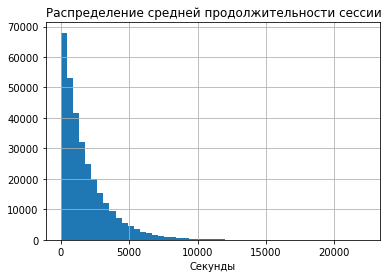

In [16]:
visits['session_duration_sec'] = (
    visits['session_end'] - visits['session_start']
).dt.seconds

print(f'Среднее значение, секунды: {visits.session_duration_sec.mean()}')
print(f'Медианное значение, секунды: {visits.session_duration_sec.median()}')


# строим гистограмму
visits['session_duration_sec'].hist(bins=50)
plt.title('Распределение средней продолжительности сессии', loc='left')
plt.xlabel('Секунды')
plt.show()

**Секунды, проведённые пользователями в приложении, имеют экспоненциальное распределение с пиком в районе нуля. И это нормально — в любом цифровом сервисе очень многие сессии заканчиваются техническими ошибками.**

**Средняя сессия длится в районе 30-ти минут, медианная - примерно 21.**

#### Рассмотрим датасет orders.

In [17]:
orders.revenue.unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

**Как мы видим, речь идет о пяти продуктах с фиксированной ценой.**

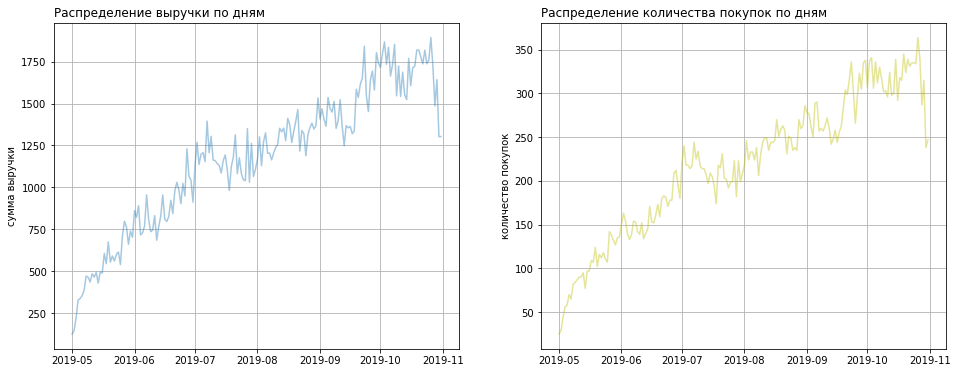

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='sum'
    ), alpha=0.4
)
ax1.grid(True)
ax1.set_title('Распределение выручки по дням',  loc='left')
ax1.set_ylabel('сумма выручки')

ax2.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='count'),
    color='y', 
    alpha=0.4
)

ax2.grid(True)
ax2.set_title('Распределение количества покупок по дням',  loc='left')
ax2.set_ylabel('количество покупок')
plt.show()

**На графиках распределения выручки и покупок видим устойчивый рост на протяжении исследуемого периода.**

#### Рассмотрим датасет costs.

**Выделим затраты на рекламу в разрезе каналов привлечения в приложение.**

In [19]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [20]:
costs.sum()

channel    FaceBoomFaceBoomFaceBoomFaceBoomFaceBoomFaceBo...
costs                                               105497.3
dtype: object

**В результате знакомства с данными можно сделать вывод: Основные затраты (52 % и 31%) от общей суммы приходятся на TipTop и FaceBoom. Всего представлено 10 каналов привлечения. Средняя сессия длится в районе 30-ти минут, медианная - примерно 21.  На графиках распределения выручки и покупок видим устойчивый рост на протяжении исследуемого периода. Получили значения, характеризующие,сколько в среднем сессий приходится на одного пользователя за месяц. Провёл предобработку данных: поменял тип данных в нескольких столбцах на 'date', так же проверил данные на наличие дубликатов, привёл наименования столбцов к единому стилю, добавил новые столбцы и сгруппировал данные для наглядности.**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI из прошлых уроков: get_profiles(), get_retention(), get_conversion() и get_ltv().

##### get_profiles()

In [21]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [22]:
profiles = get_profiles(visits, orders, costs)

**Установлю момент и горизонт анализа данных.**

**Согласно заданию, анализ нужно провести по состоянию на 1 ноября 2019 года,  наша так как выгрузка содержит данные по 27 октября 2019 года, возьмем эту дату.
В бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через две недели после привлечения.**

**Функция для расчёта удержания.**

##### get_retention()

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта конверсии.**

##### get_conversion()

In [24]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта LTV и ROI.**

##### get_ltv()

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Зададим функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

##### filter_data()

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df



##### plot_retention()

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### plot_conversion()

In [28]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### plot_ltv_roi()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Задал функции для расчёта профилей пользователей, конверсии, удержания, LTV, ROI, а также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().**

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [30]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [31]:
observation_date = profiles['dt'].max()  # момент анализа
analysis_horizon = 14  # горизонт анализа

# считаем минимальную привлечения
min_analysis_date = profiles['dt'].min()

# считаем максимальную дату привлечения
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1) 

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-14


**Установил, что минимальная дата привлечения пользователе: 2019-05-01, максимальная: 2019-10-14.**

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

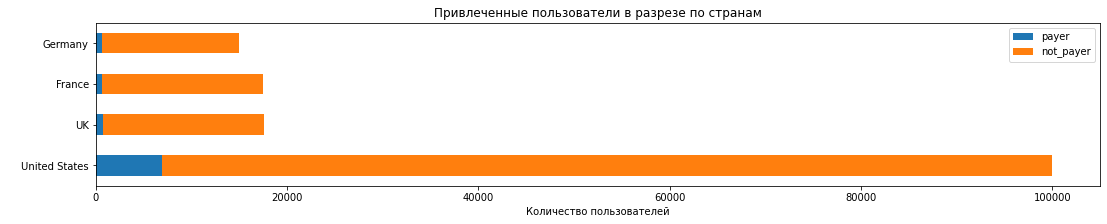

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [33]:
fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh',ax=ax, stacked=True)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе по странам')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

**Видим, что подавляющее большинство привлеченных пользователей - из США. Они же лидируют по количеству платящих пользователей. Франция и Великобритания схожи  по показателям, в отстающих - Германия (но при этом по доле платящих пользователей она на втором месте).**

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

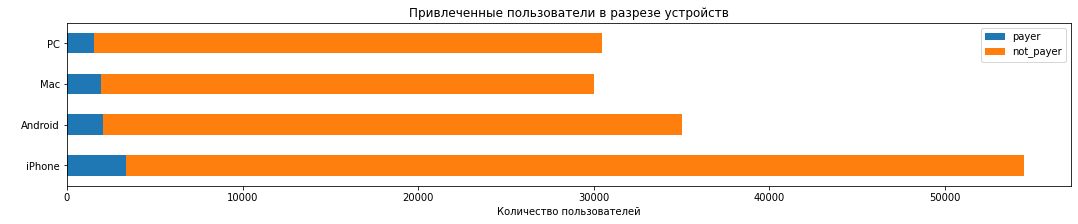

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,0.062
Android,32982,2050,0.059
Mac,28130,1912,0.064
PC,28918,1537,0.050


In [35]:
fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', ax=ax, stacked=True)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе устройств')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer)).round(3)
device



**Платящие и не платящие клиенты предпочитают, ожидаемо, iOs и андроид, на них приходится 36% и 23%, конверсия примерно на одном уровне.**

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

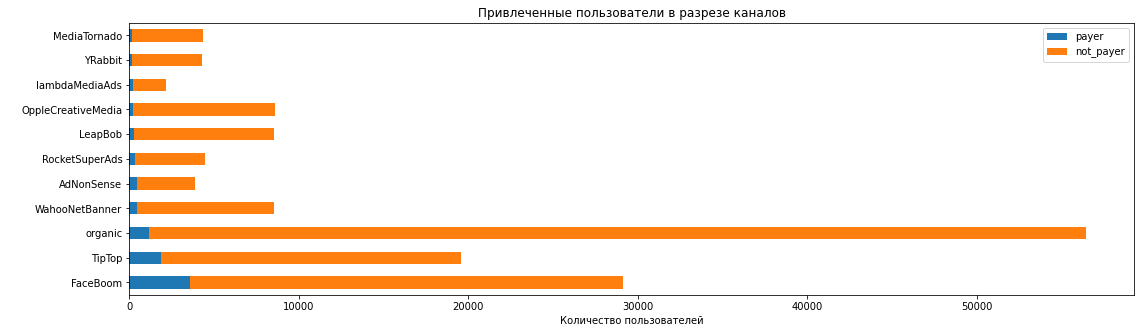

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,0.122049
TipTop,17683,1878,0.096007
organic,55279,1160,0.020553
WahooNetBanner,8100,453,0.052964
AdNonSense,3440,440,0.113402
RocketSuperAds,4096,352,0.079137
LeapBob,8291,262,0.030633
OppleCreativeMedia,8372,233,0.027077
lambdaMediaAds,1924,225,0.104700


In [37]:
fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', ax=ax, stacked=True)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе каналов')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer).round(2))
channel

**Больше всего пользуются приложением органические пользователи, правда их доля конверсии очень низкая. Два самых больших канала - TipTop и FaceBoom показывают неплохие результаты. Так же, хороших поток привлеченных платящих пользователей показывает AdNonSense.**

- Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
- Определили основной рынок: больше всего приходит пользователей из США, и они лучше других конвертируются;
- При этом большая часть пользователей заходит с мобильных устройств;
- Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, следовательно можем заключить, что пользователи Apple имеют лучшую конверсию в покупателей.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг.

In [38]:
costs.sum()

channel    FaceBoomFaceBoomFaceBoomFaceBoomFaceBoomFaceBo...
costs                                               105497.3
dtype: object

**Общие затраты равны 105497.3.**

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [39]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**На первые два источника (TipTop и FaceBoom) приходится 83% затрат, остальные с большим отставанием.**

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [40]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

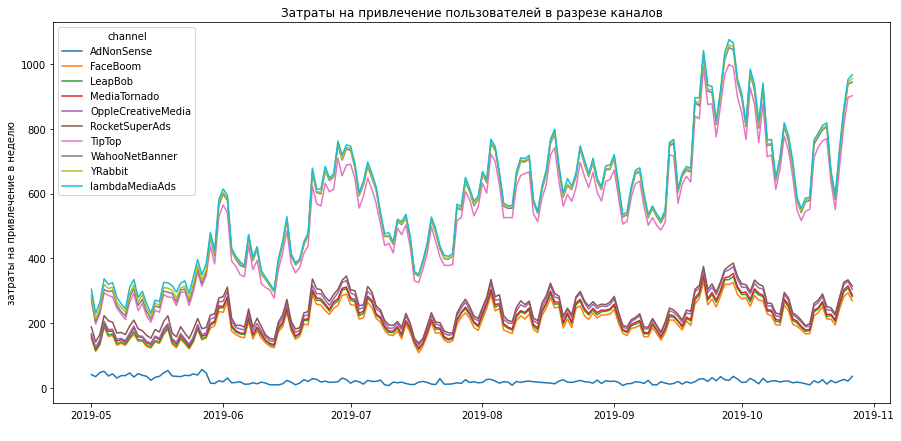

In [41]:
# построим график помесячных затрат по каналам

fig, ax = plt.subplots(figsize=(15, 7))

(costs
 .pivot_table(
    index=costs.dt,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов')
ax.set_ylabel('затраты на привлечение в неделю')
ax.set_xlabel(' ')
plt.show()

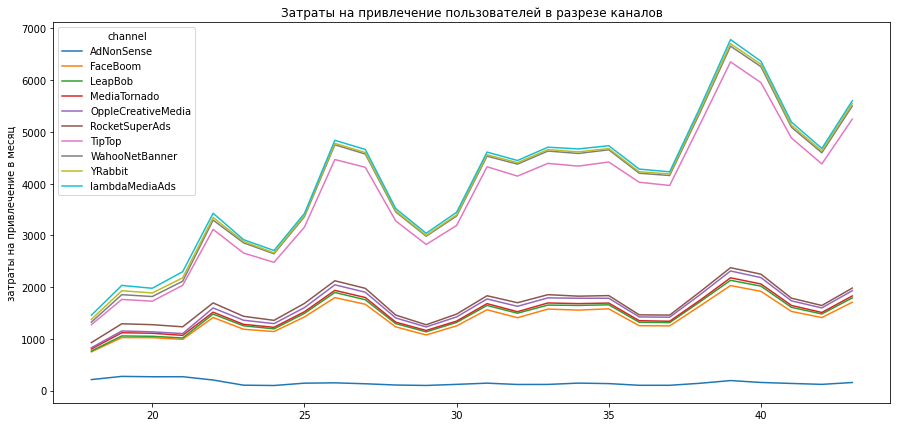

In [42]:
# построим график помесячных затрат по каналам

fig, ax = plt.subplots(figsize=(15, 7))

(costs
 .pivot_table(
    index='week',
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов')
ax.set_ylabel('затраты на привлечение в месяц')
ax.set_xlabel(' ')
plt.show()

**Лидируют в затратах на привлечение по месяцам и по неделям всё те же: TipTop, LeapBob, FaceBoom, YRabbit и lambdaMediaAds.**

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [43]:
cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost    1.127481
dtype: float64

In [44]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Общие затраты на маркетинг равны 105497.3. На первые два источника (TipTop и FaceBoom) приходится 83% затрат, остальные с большим отставанием.**

**Лидируют в затратах на привлечение по месяцам и по неделям всё те же: TipTop, LeapBob, FaceBoom, YRabbit и lambdaMediaAds.**

**Как мы видим, дороже всего приложению обходится пользователь, которого привлекли просредством TipTop.**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

####  Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

**Так как мы приступаем к анализу окупаемости, исключаем из скоупа данных всех органических пользователей: они приносят доход, но их привлечение компании ничего не стоило.**

In [45]:
profiles = profiles.query('channel != "organic"')

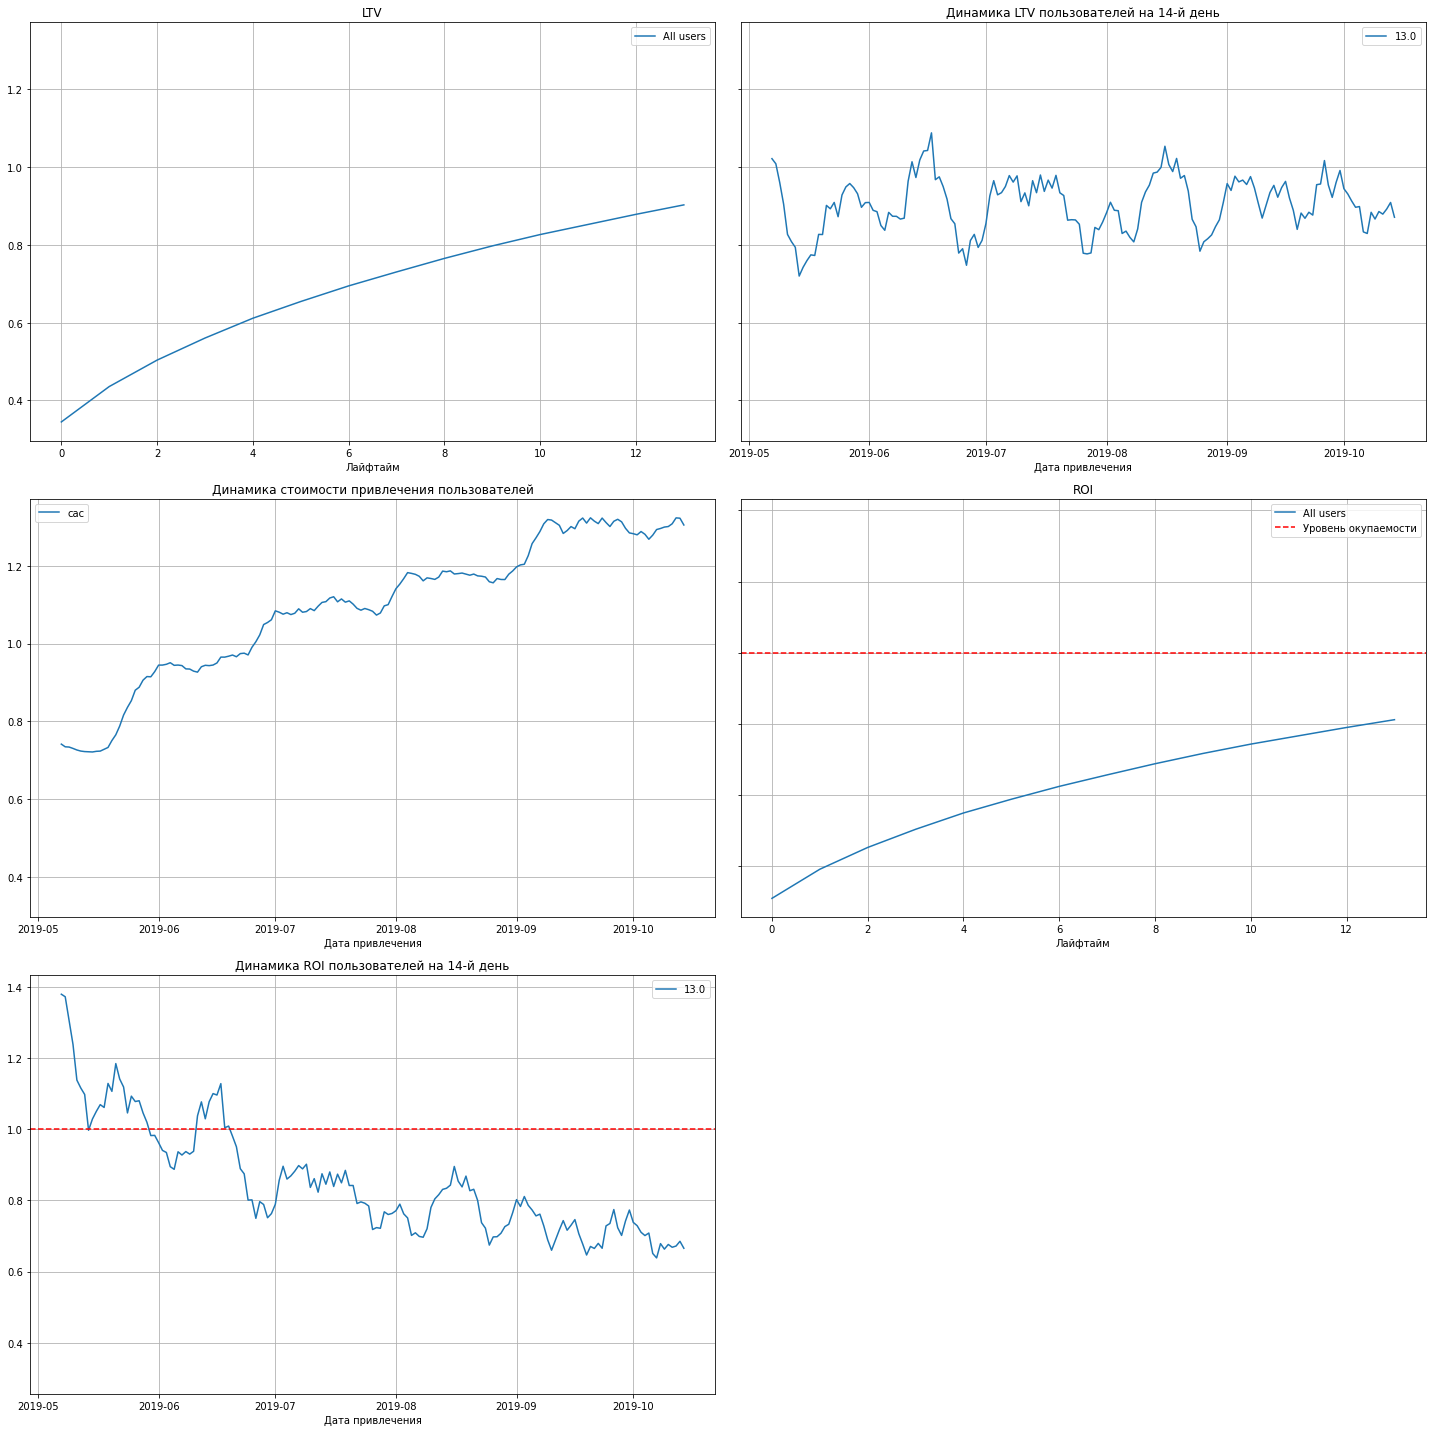

In [46]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

**Выводы, которые можно сделать по этим графикам:**

- Реклама к 14-му дню и далее не окупается;
- САС растет, значит рекламный бюджет увеличивается;
- Начиная с июня что-то идет не так: привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

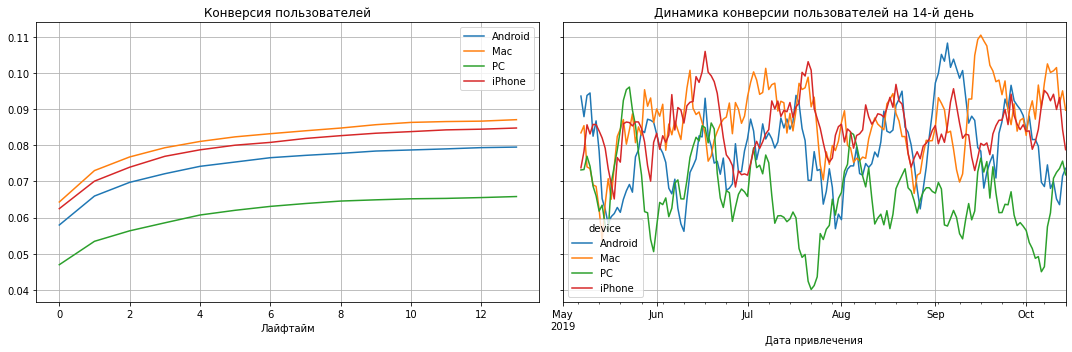

In [47]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

**Все устройства хорошо конверсируются, в лидерах устройства производста компании Apple, из общего потока немного выбиваются привлеченные пользователи, использующие PC: они привлекаются не так удачно.**

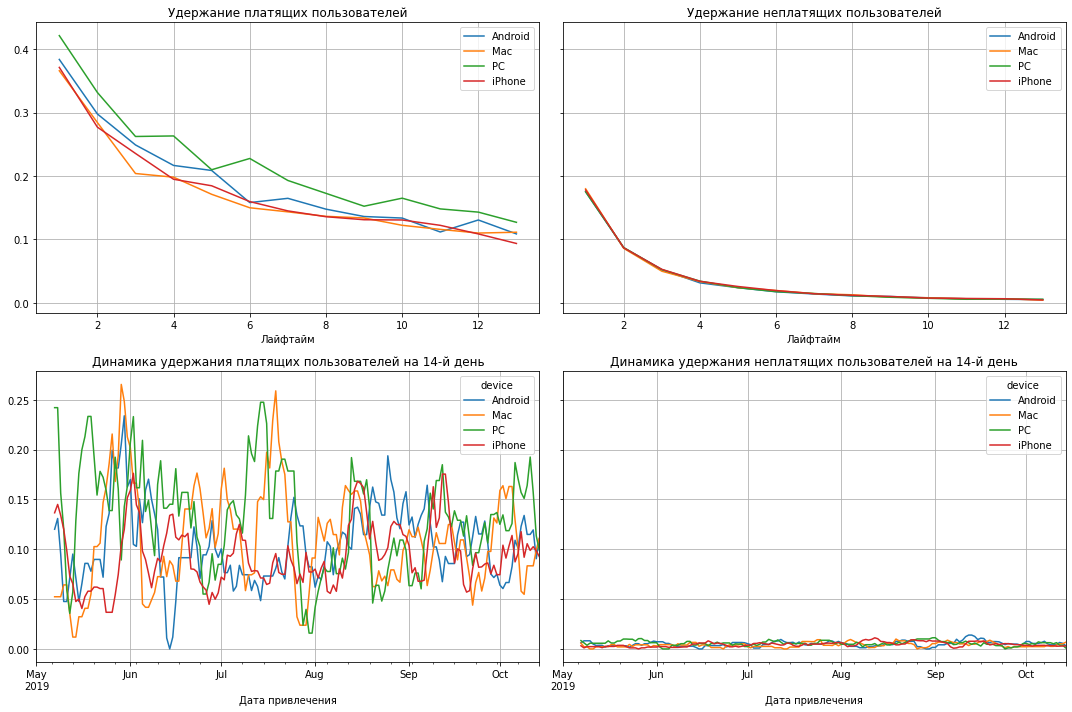

In [48]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Удержания пользователей в зависимости от устройств не очень сильно отличаются друг от друга, платящие пользователи PC удерживаются чуть лучше.**

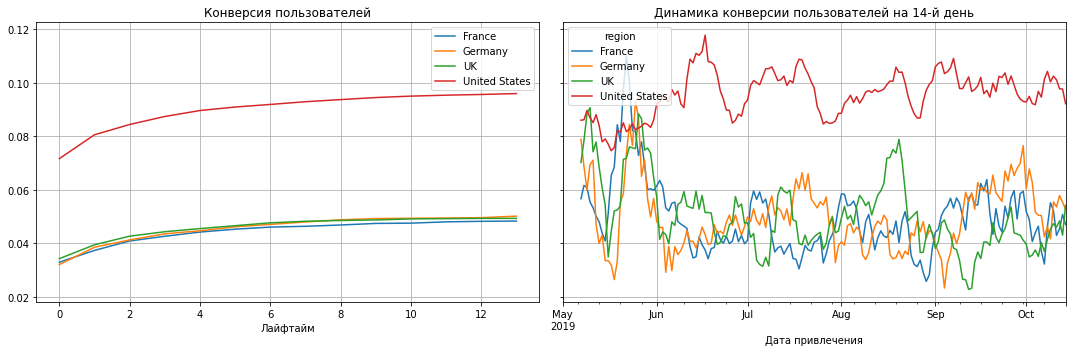

In [49]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

**Конверсия пользователей США почти в два раза выше конверсии пользователей других стран.**

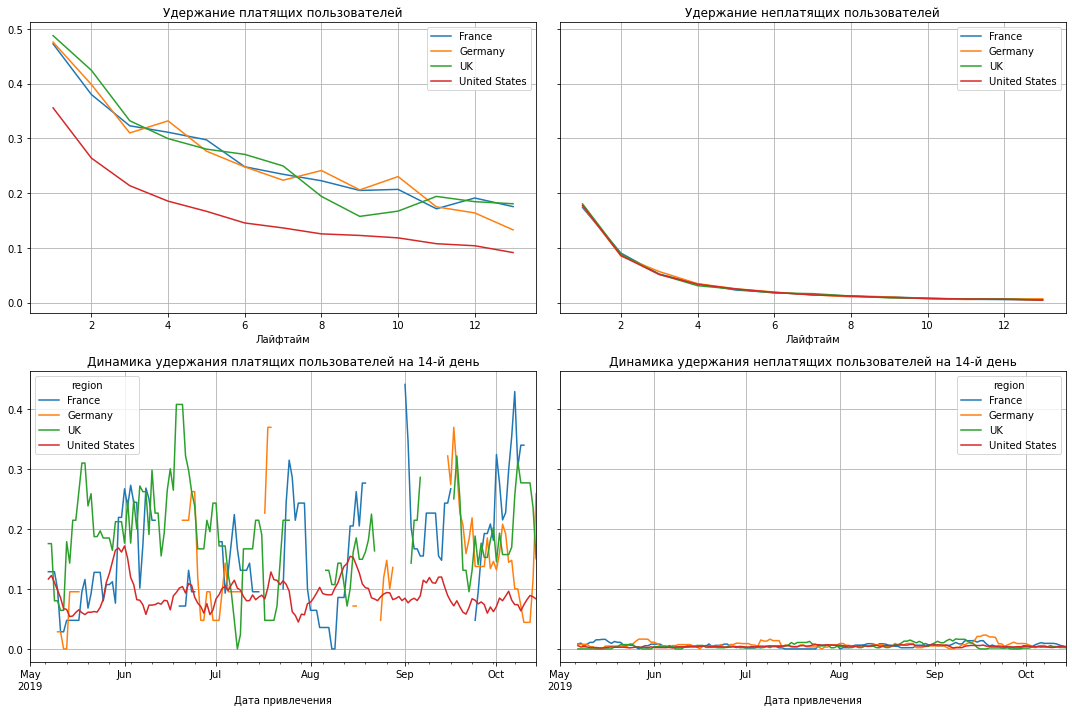

In [50]:
# смотрим удержание с разбивкой по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**С удержанием платящих пользователей США хуже всех.
Неплатящие пользователи не показываю каких-то отличий (ни тип устройства, ни регион на их удержание не влияют).**

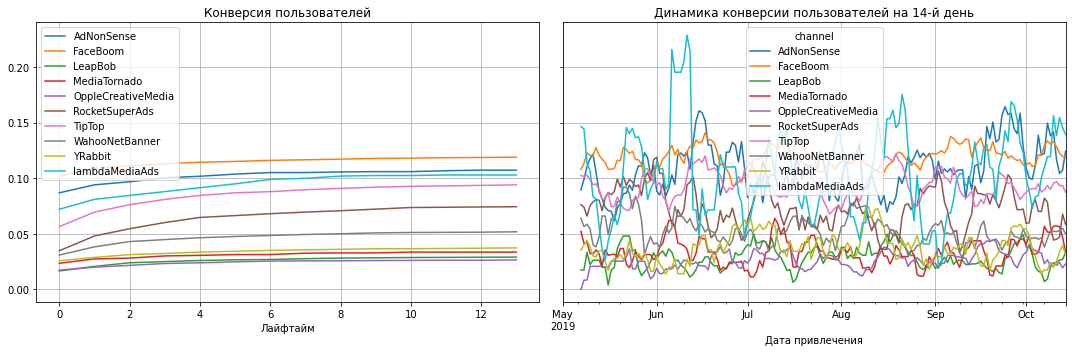

In [51]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

**Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. При этом отметим, динамики у всех пользователей в течение двухнедельного лайфтайма практически нет.**

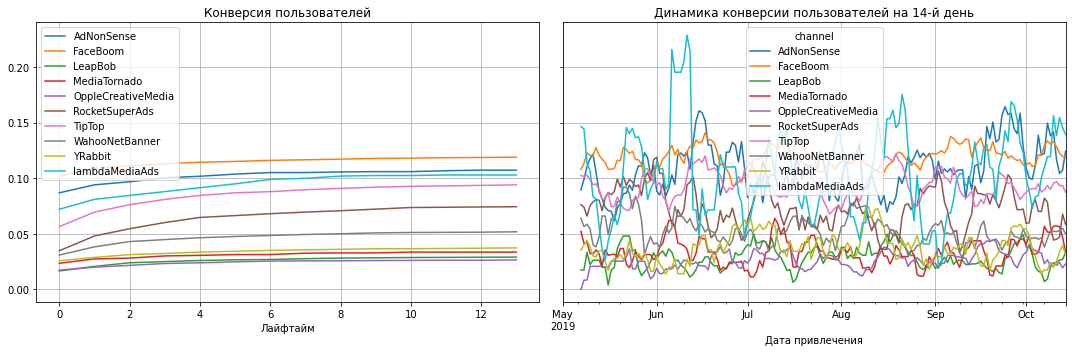

In [52]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

**Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense.**

**В результате анализа окупаемости рекламы можно сделать выводы:**

- В общем и целом реклама не окупается;
- Это вызвано низкой окупаемостью рекламы в США, как основной страны присутствия;
- Один из самых проблемных каналов - FaceBoom (не окупается имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей); далее хотим отметить TipTop - неоправданно высокий рост САС, в следствие чего он через месяц перестал окупаться;
- По устройствам в аутсайдерах конверсии пользователи PC, но при этом они неплохо удерживаются.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

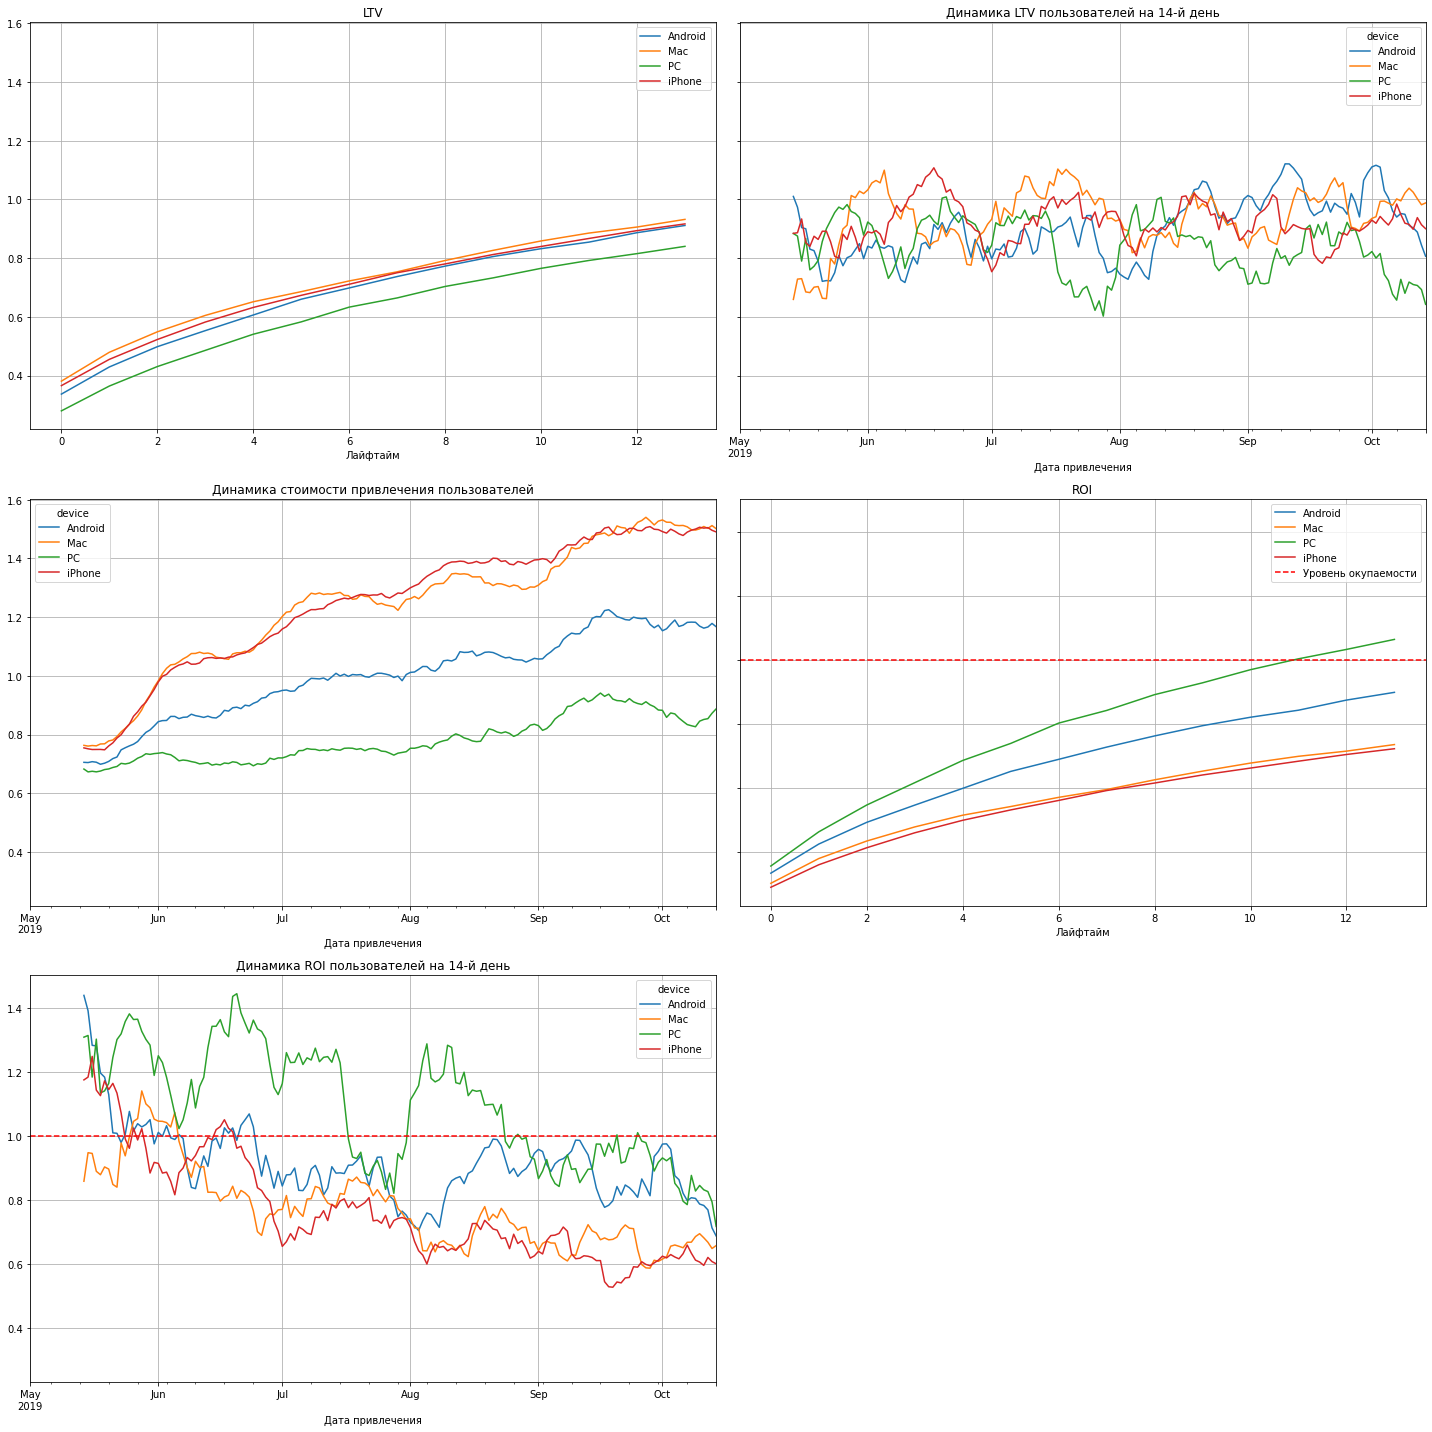

In [53]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

**Ltv растёт у пользователей всех устройств с течением рекламной кампании, при этом окупаемость инвестиций держится ниже уровня окупаемости практически на всём исследуемом промежутке, это плохой знак.**

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

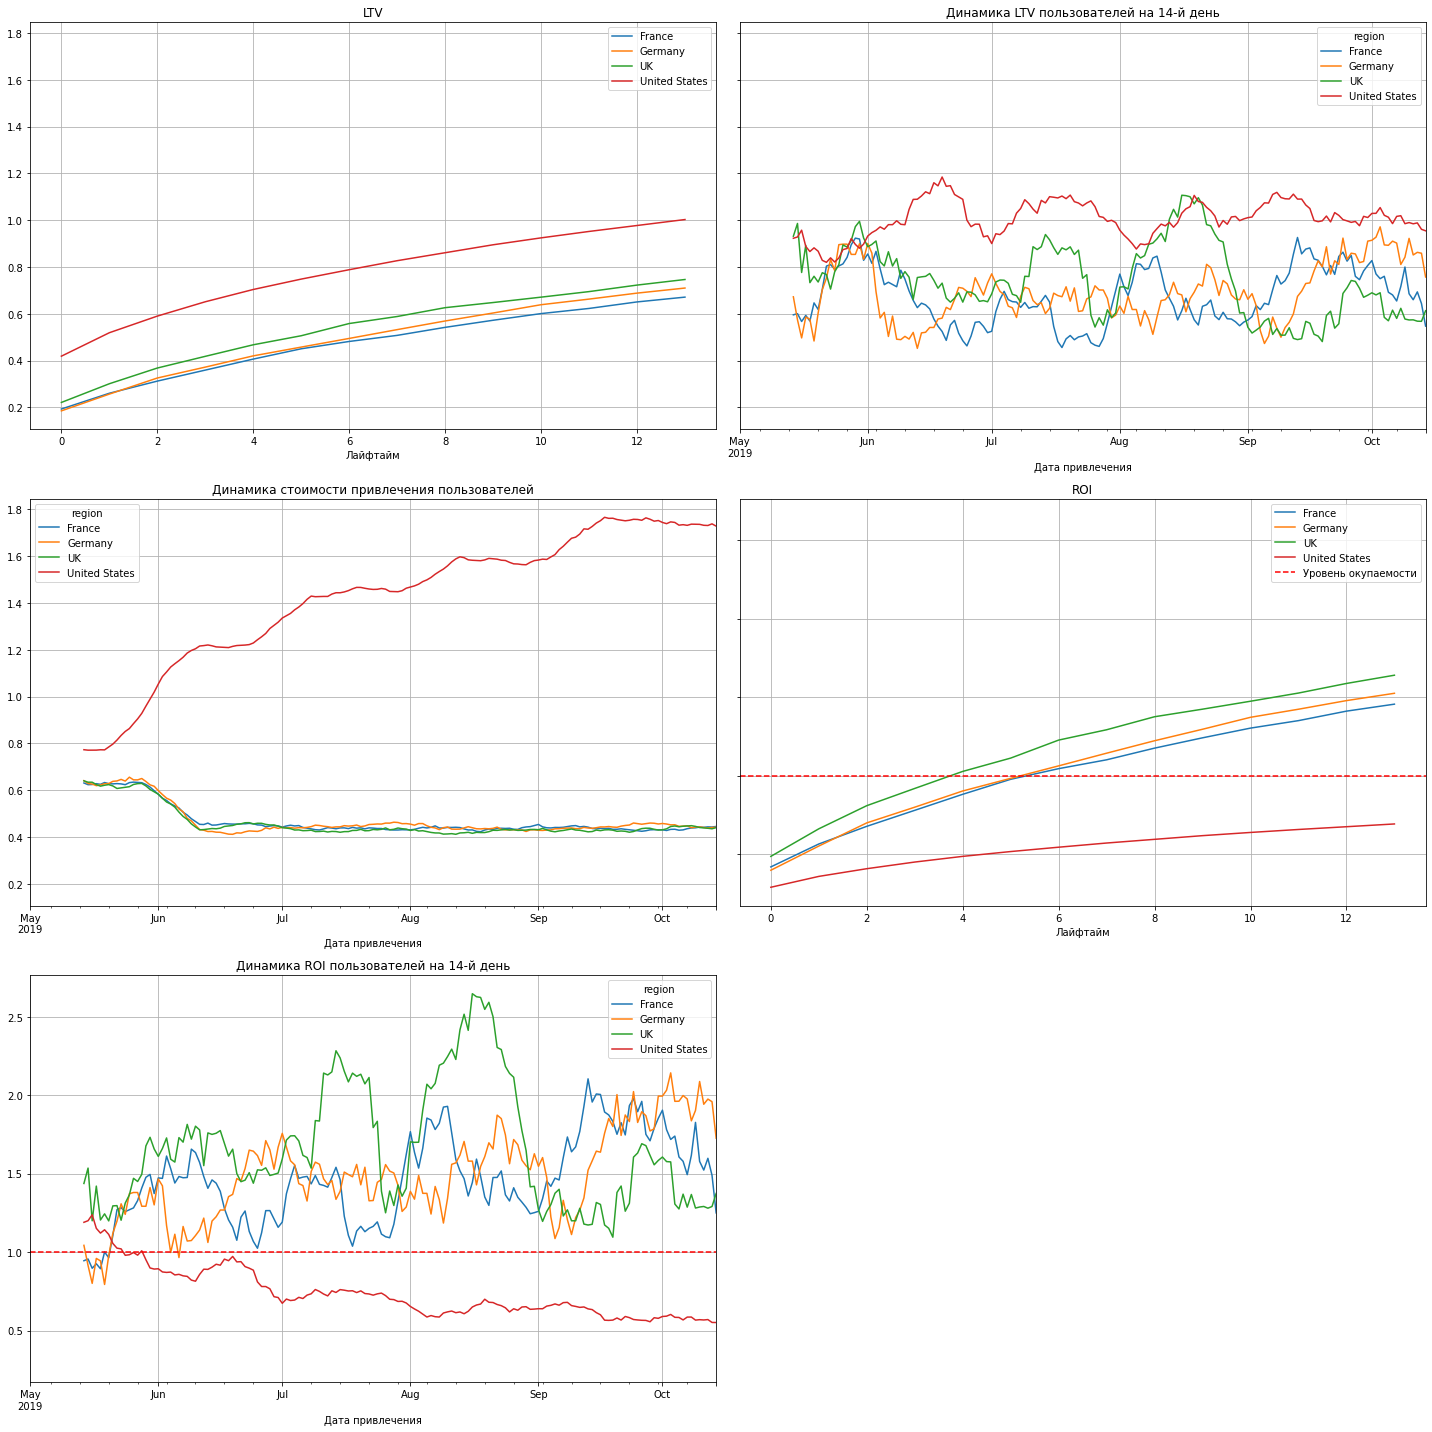

In [54]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

**Отметим следующее:**

- Несмотря на огромное количество привлеченных пользователей из США, прибыли от них немного, они быстро приходят и быстро уходят, ROI ниже уровня уровня окупаемости почти на всём графике;
- Затраты на рекламу в Европе остаются неизменными и окупаются, а вот в США растут и перестали окупаться с июня (возможно, благодаря большим инвестициям в TipTop).

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим те же графики (LTV и ROI, а также графики динамики LTV, CAC и ROI).

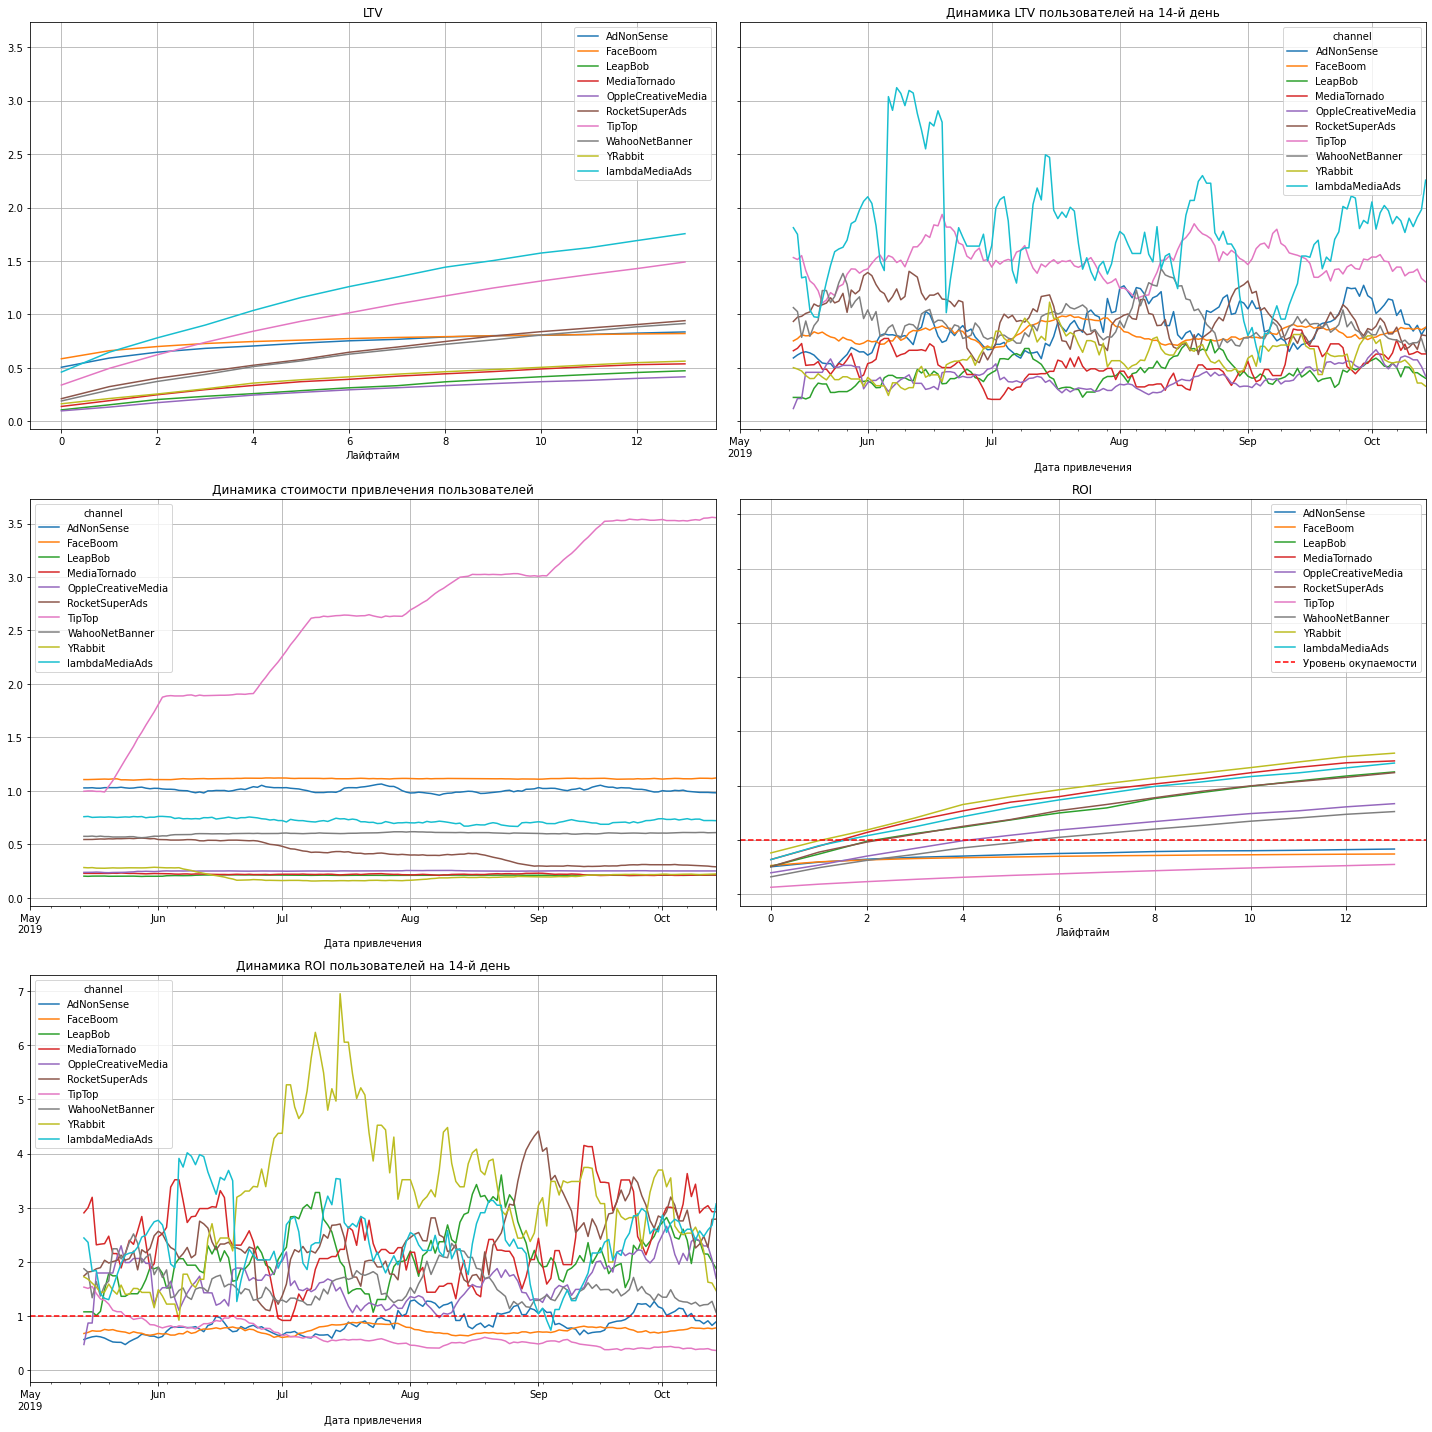

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

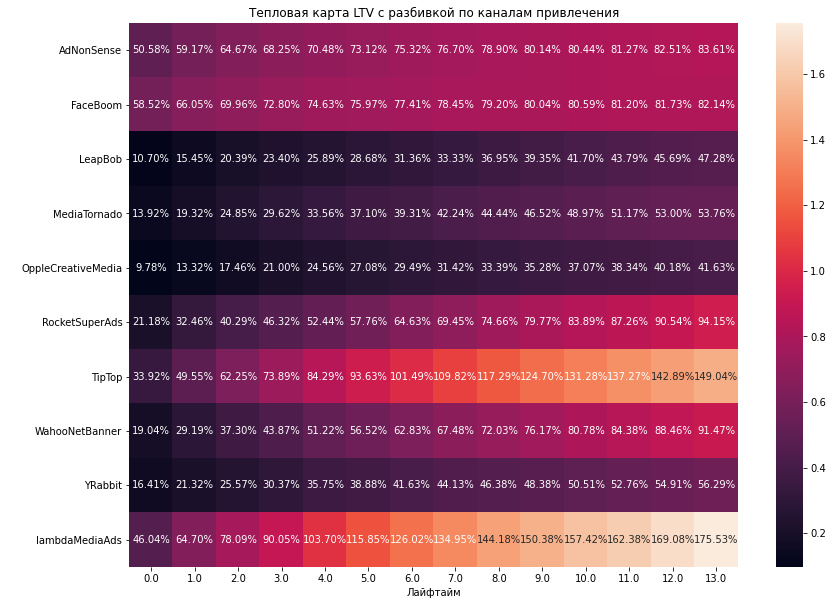

In [56]:
# хитмэп LTV
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

По этим графиком отмечаем:

- На двухнедельном лайфтайме затраты на рекламу у самых тратящих компаний (TipTop и FaceBoom) - не окупаются;

- Отметим положительную динамику LTV у RocketSuperAds;

- У TipTop c растущими затратами, также увеличивается «пожизненная ценность» клиента клиента, каждый месяц;

- Перспективным каналом кажется lambdaMediaAds - низкая стоимость привлечения и высокие показатели WahooNetBanner LTV;

- Посмотрим дополнительно графики только по каналам из топ4 САС.


In [57]:
display(cac_channel.head(4))

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802


**Всё так, как мы описали выше, и именно на это идут порядка 80% из рекламного бюджета.**

**Посмотрим, какие каналы за какие регионы отвечают.**

In [58]:
(profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}).values).fillna(0).style.format('{:.2%}')

**Каналы привлечения имеют специализацию по странам.**

**При этом каналы, работающие на европейскую публику одинаково представлены как в во Франции, так и в Великобритании с Германией.Этот факт можно и нужно учесть, при выборе замены, если это потребуется.**

- Реклама к 14-му дню и далее не окупается;
- САС растет, значит рекламный бюджет увеличивается;
- Начиная с июня что-то идет не так: привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.

**Все устройства хорошо конверсируются, в лидерах устройства производста компании Apple, из общего потока немного выбиваются привлеченные пользователи, использующие PC: они привлекаются не так удачно.**

**Удержания пользователей в зависимости от устройств не очень сильно отличаются друг от друга, платящие пользователи PC удерживаются чуть лучше.**
**Конверсия пользователей США почти в два раза выше конверсии пользователей других стран. С удержанием платящих пользователей США хуже всех. Неплатящие пользователи не показываю каких-то отличий (ни тип устройства, ни регион на их удержание не влияют).**

**Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. При этом отметим, динамики у всех пользователей в течение двухнедельного лайфтайма практически нет.**

Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense.

В результате анализа окупаемости рекламы можно сделать выводы:

- В общем и целом реклама не окупается;
- Это вызвано низкой окупаемостью рекламы в США, как основной страны присутствия;
- Один из самых проблемных каналов - FaceBoom (не окупается имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей); далее хотим отметить TipTop - неоправданно высокий рост САС, в следствие чего он через месяц перестал окупаться;
- По устройствам в аутсайдерах конверсии пользователи PC, но при этом они неплохо удерживаются.

- Несмотря на огромное количество привлеченных пользователей из США, прибыли от них немного, они быстро приходят и быстро уходят, ROI ниже уровня уровня окупаемости почти на всём графике;
- Затраты на рекламу в Европе остаются неизменными и окупаются, а вот в США растут и перестали окупаться с июня (возможно, благодаря большим инвестициям в TipTop).

**LTV растёт у пользователей всех устройств с течением рекламной кампании, при этом окупаемость инвестиций держится ниже уровня окупаемости практически на всём исследуемом промежутке, это плохой знак.**

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Было произведено исследование и анализ метрик развлекательного приложения Procrastinate Pro+, с помощью инструментальных функций и графиков оценил рентабельность рекламной компании на 10 источников, посчитайте общую сумму расходов на маркетинг. Посчитал необходимые для бизнеса показатели, такие как: конверсия, удержание, LTV, ROI, CAC, сделал рекомендации бизнесу для улучшение положения.

Компания-заказчик представлена на рынке Европы (Германия, Франция и Великобритания) и в США. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Мы проанализировали данные, предоставленные компанией-заказчиком (информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года):

- лог сервера с данными об их посещениях;
- выгрузку покупок за этот период;
- рекламные расходы.

В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop в США и AdNonSence в Европе (топ3 САС):

- Высокая стоимость привлечения у этих каналов, с горизонтом событий в две недели она не окупается;
- При этом, платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются;
- Расходы на привлечение в TipTop за полгода выросли почти в три раза.

В качестве рекомендаций предлагаю следующие направления:

С учётом того, что подавляющее количество пользователей из США, необходиом проработать отношения с рекламными площадками этого направления:

- Отказаться от FaceBoom и перенаправить рекламные средства в пользу других каналов (например lambdaMediaAds);
- Выявить причину роста САС канала TipTop и по возможности устранить ее. Если это невозможно, то отказаться от этой рекламной площадки в пользу других;
- Достаточно перспективным выглядит RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне);
- Обратить внимание на европейский рынок, например, увеличить расходы на рекламу в lambdaMediaAds и снизить в AdNonSense;
- Поработать с органическими пользователями: это существенная доля дохода приложения.